In [1]:
using PyPlot
using StatsBase
using Statistics
using DataFrames
using CSV

In [2]:
n_sweep = 50 
n_therm = 10^4 
n_write = 5*10^3
temps = vcat((5.0:-0.1:3.0),(2.95:-0.02:2.45),(2.4:-0.005:2.2),(2.15:-0.02:1.65),(1.6:-0.1:0.2))

129-element Array{Float64,1}:
 5.0
 4.9
 4.8
 4.7
 4.6
 4.5
 4.4
 4.3
 4.2
 4.1
 4.0
 3.9
 3.8
 ⋮  
 1.3
 1.2
 1.1
 1.0
 0.9
 0.8
 0.7
 0.6
 0.5
 0.4
 0.3
 0.2

In [177]:
function startconfig(L)    
    s  = Array{Int32}(undef, L,L)   
    for j in 1:L
        for i in 1:L
            if rand()<=0.5
                s[j,i] = 1
            else
                s[j,i] = -1
            end
        end
    end
    return s
end

startconfig (generic function with 1 method)

In [178]:
function sweep(n,T,s,L)
    for i in 1:n
        for x in 1:L
            for y in 1:L
                flip(x,y,T,s,L)
            end
        end
    end
end

sweep (generic function with 1 method)

In [179]:
function flip(x,y,T,s,L)
    r = 1+mod(y,L)
    d = 1+mod(x,L)
    l = 1+mod(y-2,L) 
    u = 1+mod(x-2,L) 
    
    de = 2*s[x,y]*(s[x,r]+s[x,l]+s[u,y]+s[d,y])
    
    if de<0
        s[x,y] = -s[x,y]
    else
        p = rand()
        if p<exp(-de/T)
            s[x,y] = -s[x,y]
        end
    end
end

flip (generic function with 1 method)

In [180]:
function measure(i, energy, magnetization, s,L)
    en = 0 
    m = 0 
    
    for x in 1:L 
        for y in 1:L
            r = 1+mod(y,L)
            d = 1+mod(x,L)
            l = 1+mod(y-2,L) 
            u = 1+mod(x-2,L) 
            en -= 1/2*s[x,y]*(s[x,r]+s[x,l]+s[u,y]+s[d,y])
            m += s[x,y]
        end
    end
    energy[i] = en 
    magnetization[i] = abs(m)
end

measure (generic function with 1 method)

In [181]:
function main(L)
    N=L^2
    e_temp = Array(1:n_write)
    m_temp = Array(1:n_write)
    e = []
    m = []
    #m_sq = []
    #e_sq = []
    c_vs = []
    xis = []
    s = startconfig(L)
    
    for T in temps 
        
        sweep(n_therm,T,s,L)
        energy = e_temp
        magnetization = m_temp
        
        for i in 1:n_write
            sweep(n_sweep,T,s,L)
            measure(i, energy, magnetization, s,L)
        end
        
        en_ave = sum(energy)
        ma_ave = sum(magnetization)
        #masq_ave = sum((magnetization/N).^2)
        #esq_ave = sum((energy/N).^2)
        xi = var(magnetization/N)/T
        c_v = var(energy/N)/T^2
        push!(e,en_ave/(N*n_write))
        push!(m,ma_ave/(N*n_write))
        #push!(m_sq,masq_ave/n_write)
        #push!(e_sq,esq_ave/n_write)
        push!(c_vs,c_v)
        push!(xis,xi)
    end
    return e,m,c_vs,xis
end

main (generic function with 1 method)

# Plots for lattice size 16x16 
## (see below for several sizes)

In [354]:
L=16
e,m,c_vs,xis = main(L)

(Any[-0.431234, -0.446266, -0.470328, -0.49225, -0.53425, -0.552781, -0.588891, -0.635547, -0.689906, -0.744016  …  -1.89933, -1.91678, -1.92717, -1.9688, -1.9888, -1.99708, -1.99978, -2.0, -2.0, -2.0], Any[0.0855781, 0.0854766, 0.087125, 0.0902188, 0.101305, 0.106766, 0.10875, 0.118234, 0.13332, 0.145187  …  0.970469, 0.976234, 0.97918, 0.991656, 0.997078, 0.999266, 0.999945, 1.0, 1.0, 1.0], Any[0.0249544, 0.027721, 0.0296696, 0.0337031, 0.0410017, 0.0454686, 0.0525293, 0.060126, 0.0654028, 0.0801494  …  0.0842185, 0.0725925, 0.0732237, 0.0347204, 0.0167157, 0.00573423, 0.000695796, 0.0, 0.0, 0.0], Any[0.0547282, 0.0571067, 0.0626338, 0.0715331, 0.0889155, 0.106091, 0.11376, 0.152292, 0.194461, 0.239783  …  0.0161799, 0.0116534, 0.0116936, 0.00386494, 0.00146188, 0.000365021, 3.47898e-5, 0.0, 0.0, 0.0])

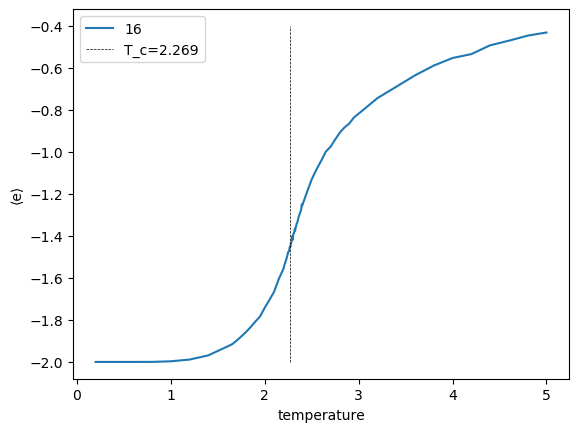

PyObject <matplotlib.legend.Legend object at 0x00000000607D4C50>

In [370]:
plot(temps,e,label="$L")
r = collect(-2:0.1:-0.4)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
xlabel("temperature")
ylabel("⟨e⟩")
legend()

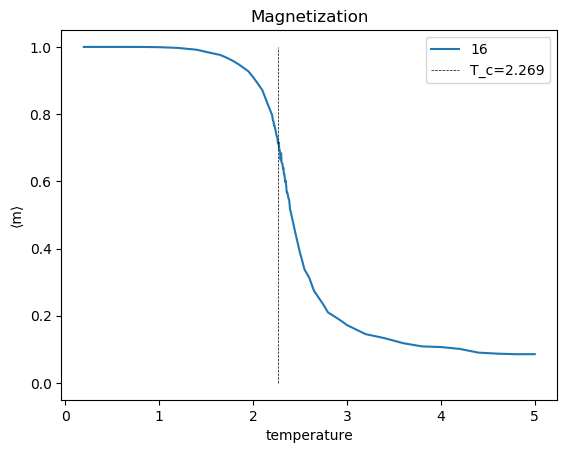

PyObject <matplotlib.legend.Legend object at 0x00000000609741D0>

In [371]:
plot(temps, m,label="$L")
r = collect(0:0.1:1)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Magnetization")
xlabel("temperature")
ylabel("⟨m⟩")
legend()

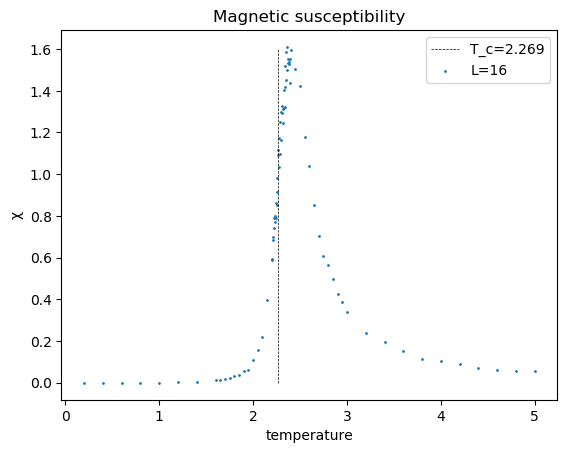

PyObject <matplotlib.legend.Legend object at 0x000000005F650400>

In [368]:
scatter(temps,xis,s=1,label="L=$L")
r = collect(0:0.1:1.6)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Magnetic susceptibility")
xlabel("temperature")
ylabel("χ")
legend()

In [ ]:
scatter(temps,c_vs,s=1,label="L=$L")
r = collect(0:0.01:0.45)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Specific heat")
xlabel("temperature")
ylabel("Cᵥ")
legend()

# Check thermalization

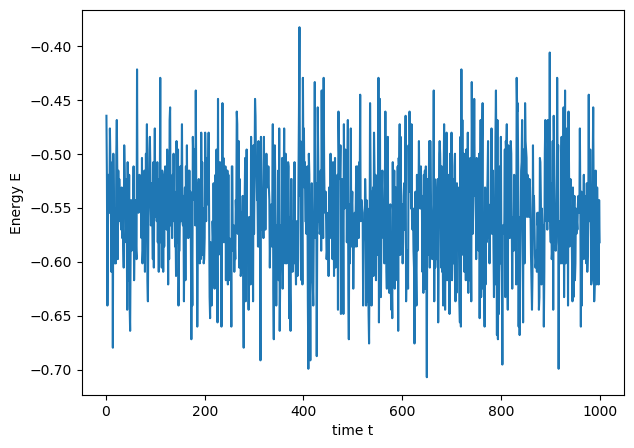

In [187]:
fig = figure("pyplot",figsize=(7,5))
n_therm_try = 1000
L=32    
N=L^2
    e_temp = Array(1:n_write)
    ma_temp = Array(1:n_write)
    e_therm = []
    s = startconfig(L)
    energy = e_temp
    magnetization = ma_temp
    
    T = 4 
        
        for i in 1:n_therm_try
            sweep(n_sweep,T,s,L)
            measure(i, energy, magnetization, s,L)
            push!(e_therm,energy[i]/N)
        end
t = collect(1:n_therm_try)
plot(t,e_therm, label="T=2")
xlabel("time t")
ylabel("Energy E")
savefig("thermalization.pdf")

# Data for various L 

In [46]:
function variousL()
    e = []
    m = []
    m_sq = []
    #e_sq = []
    ma_cu = []
    c_vs = []
    xis = []
    
    for L in [4,8,16,32,64]
        e_temp = Array(1:n_write)
        m_temp = Array(1:n_write)
        s = startconfig(L)
        N = L^2

        for T in temps 

            sweep(n_therm,T,s,L)
            energy = e_temp
            magnetization = m_temp

            for i in 1:n_write
                sweep(n_sweep,T,s,L)
                measure(i, energy, magnetization, s,L)
            end

            en_ave = sum(energy)
            ma_ave = sum(magnetization)
            masq_ave = sum((magnetization/N).^2)/n_write
            macu_ave = sum((magnetization/N).^4)/n_write
            #esq_ave = sum((energy/N).^2)
            xi = var(magnetization/N)/T
            c_v = var(energy/N)/T^2
            push!(e,en_ave/(N*n_write))
            push!(m,ma_ave/(N*n_write))
            push!(m_sq,masq_ave)
            push!(ma_cu,macu_ave)
            #push!(e_sq,esq_ave/n_write)
            push!(c_vs,c_v)
            push!(xis,xi)
        end
    end
    return e, m, m_sq, c_vs, xis, ma_cu
end

variousL (generic function with 1 method)

In [98]:
e, m, m_sq, c_vs, xis, ma_cu = variousL()

(Any[-0.45065, -0.470275, -0.48095, -0.4919, -0.515675, -0.520825, -0.53605, -0.567125, -0.589025, -0.611825  …  -1.99397, -1.99717, -1.99884, -1.99962, -1.99991, -1.99999, -2.0, -2.0, -2.0, -2.0], Any[0.337388, 0.347625, 0.353312, 0.3602, 0.3687, 0.370588, 0.378663, 0.389788, 0.402625, 0.4094  …  0.998446, 0.999278, 0.999707, 0.999904, 0.999977, 0.999997, 1.0, 1.0, 1.0, 1.0], Any[0.170889, 0.180203, 0.18543, 0.190587, 0.200044, 0.201458, 0.209552, 0.22008, 0.232909, 0.239588  …  0.996895, 0.998557, 0.999415, 0.999808, 0.999954, 0.999994, 1.0, 1.0, 1.0, 1.0], Any[0.00730131, 0.00806141, 0.00842096, 0.00906482, 0.0097829, 0.0101256, 0.0108844, 0.0117724, 0.0131826, 0.0138035  …  1.03276e-5, 5.52488e-6, 2.86645e-6, 1.17875e-6, 3.75925e-7, 6.42501e-8, 7.62634e-9, 0.0, 0.0, 0.0], Any[0.0114129, 0.0121155, 0.0126263, 0.0129467, 0.0139371, 0.0142509, 0.0150393, 0.0158494, 0.0168594, 0.0175576  …  7.90076e-7, 3.70239e-7, 1.68806e-7, 6.07151e-8, 1.65388e-8, 2.40938e-9, 2.38323e-10, 0.0, 0.0, 0

In [99]:
L4 = DataFrame(E = e[1:length(temps)], M = m[1:length(temps)], M_Sq = m_sq, C_v = c_vs[1:length(temps)], Xi = xis[1:length(temps)], Cu =ma_cu[1:length(temps)] )
L8 = DataFrame(E = e[length(temps)+1:2*length(temps)], M = m[length(temps)+1:2*length(temps)], M_Sq = m_sq[length(temps)+1:2*length(temps), C_v = c_vs[length(temps)+1:2*length(temps)], Xi = xis[length(temps)+1:2*length(temps)], Cu =ma_cu[length(temps)+1:2*length(temps)])
L16 = DataFrame(E = e[2*length(temps)+1:3*length(temps)], M = m[2*length(temps)+1:3*length(temps)], M_Sq = m_sq[2*length(temps)+1:3*length(temps)], C_v = c_vs[2*length(temps)+1:3*length(temps)], Xi = xis[2*length(temps)+1:3*length(temps)], Cu =ma_cu[2*length(temps)+1:3*length(temps)])
L32 = DataFrame(E = e[3*length(temps)+1:4*length(temps)], M = m[3*length(temps)+1:4*length(temps)], M_Sq = m_sq[3*length(temps)+1:4*length(temps)], C_v = c_vs[3*length(temps)+1:4*length(temps)], Xi = xis[3*length(temps)+1:4*length(temps)], Cu =ma_cu[3*length(temps)+1:4*length(temps)])
L64 = DataFrame(E = e[4*length(temps)+1:5*length(temps)], M = m[4*length(temps)+1:5*length(temps)], M_Sq = m_sq[4*length(temps)+1:5*length(temps)], C_v = c_vs[4*length(temps)+1:5*length(temps)], Xi = xis[4*length(temps)+1:5*length(temps)], Cu =ma_cu[4*length(temps)+1:5*length(temps)])

,E,M,M_Sq,C_v,Xi,Cu
,Any,Any,Any,Any,Any,Any
1,-0.428417,0.0209535,0.000688216,2.37403e-5,4.98386e-5,1.39008e-6
2,-0.437744,0.0213763,0.000717853,2.45742e-5,5.32515e-5,1.56968e-6
3,-0.448656,0.0215998,0.000731168,2.62748e-5,5.51344e-5,1.60097e-6
4,-0.459412,0.0220561,0.000769266,2.78989e-5,6.01755e-5,1.78427e-6
5,-0.471728,0.0223588,0.000783649,2.97522e-5,6.16873e-5,1.82138e-6
6,-0.483615,0.0227371,0.000811109,3.08468e-5,6.53698e-5,1.96362e-6
7,-0.496779,0.0233776,0.000861878,3.25506e-5,7.16809e-5,2.22285e-6
8,-0.510533,0.0235469,0.000875094,3.45826e-5,7.45741e-5,2.3682e-6
9,-0.525059,0.0244855,0.000936268,3.67547e-5,8.01814e-5,2.58356e-6


In [125]:
CSV.write("L4_50sweeps_10000_measurements.csv",L4)
CSV.write("L8_50sweeps_10000_measurements.csv",L8)
CSV.write("L16_50sweeps_10000_measurements.csv",L16)
CSV.write("L32_50sweeps_10000_measurements.csv",L32)
CSV.write("L64_50sweeps_10000_measurements.csv",L64)

"L64_50sweeps_10000_measurements.csv"

In [3]:
L4=CSV.read("L4_50sweeps_5000_measurements.csv", use_mmap=false)
L8=CSV.read("L8_50sweeps_5000_measurements.csv", use_mmap=false)
L16=CSV.read("L16_50sweeps_5000_measurements.csv", use_mmap=false)
L32=CSV.read("L32_50sweeps_5000_measurements.csv", use_mmap=false)
L64=CSV.read("L64_50sweeps_5000_measurements.csv", use_mmap=false)

,E,M,M_Sq,C_v,Xi,Cu
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.429588,0.0211489,0.000695873,2.43774e-5,4.97689e-5,1.51321e-6
2,-0.438334,0.0217158,0.000742591,2.47432e-5,5.53645e-5,1.69197e-6
3,-0.448981,0.0212764,0.000725891,2.79778e-5,5.69751e-5,1.62639e-6
4,-0.458894,0.0232925,0.000825479,2.92482e-5,6.02602e-5,1.89974e-6
5,-0.471381,0.0209766,0.000693782,3.0455e-5,5.52217e-5,1.45724e-6
6,-0.483191,0.0225605,0.000784856,2.9905e-5,6.13675e-5,1.73161e-6
7,-0.496791,0.0222358,0.000803247,3.47998e-5,7.02553e-5,2.25691e-6
8,-0.510414,0.0247939,0.000986841,3.34143e-5,8.66217e-5,3.18139e-6
9,-0.524891,0.0244233,0.000946827,3.55135e-5,8.34948e-5,2.72908e-6


# Plots for several lattice sizes 

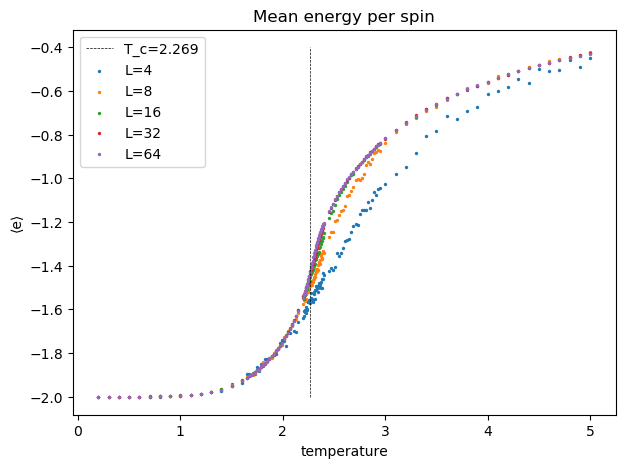

In [205]:
fig = figure("pyplot",figsize=(7,5))
scatter(temps,L4.E,s=2,label="L=4")
scatter(temps,L8.E,s=2,label="L=8")
scatter(temps,L16.E,s=2,label="L=16")
scatter(temps,L32.E,s=2,label="L=32")
scatter(temps,L64.E,s=2,label="L=64")
r = collect(-2:0.1:-0.4)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
xlabel("temperature")
ylabel("⟨e⟩")
title("Mean energy per spin")
legend()
savefig("Energy.pdf")

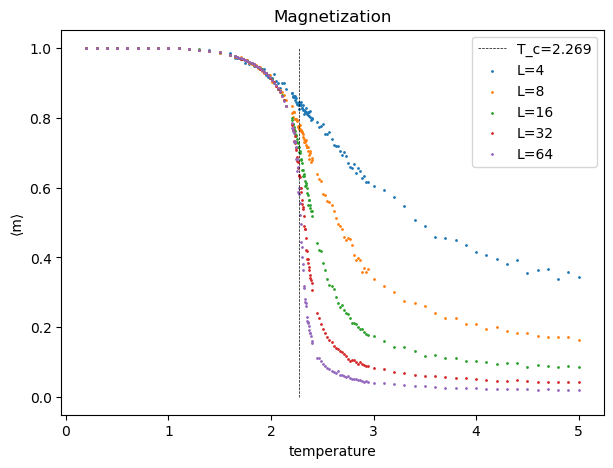

In [206]:
fig = figure("pyplot",figsize=(7,5))
scatter(temps,L4.M,s=1,label="L=4")
scatter(temps,L8.M,s=1,label="L=8")
scatter(temps,L16.M,s=1,label="L=16")
scatter(temps,L32.M,s=1,label="L=32")
scatter(temps,L64.M,s=1,label="L=64")
r = collect(0:0.1:1)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Magnetization")
xlabel("temperature")
ylabel("⟨m⟩")
legend()
savefig("Magnetization.pdf")

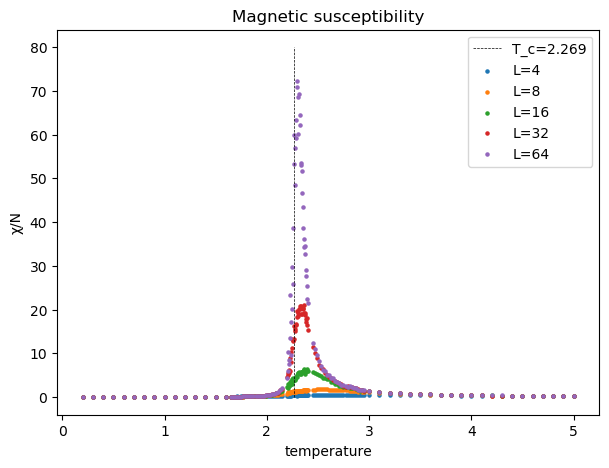

In [207]:
fig = figure("pyplot",figsize=(7,5))
scatter(temps,(L4.Xi).*4^2,s=5,label="L=4")
scatter(temps,(L8.Xi).*8^2,s=5,label="L=8")
scatter(temps,(L16.Xi).*16^2,s=5,label="L=16")
scatter(temps,(L32.Xi).*32^2,s=5,label="L=32")
scatter(temps,(L64.Xi).*64^2,s=5,label="L=64")
r = collect(0:0.1:80)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Magnetic susceptibility")
xlabel("temperature")
ylabel("χ/N")
legend()
savefig("Mag_susc.pdf")

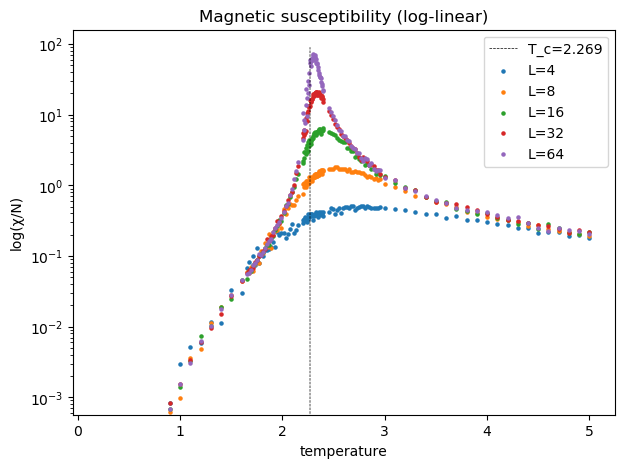

In [208]:
fig = figure("pyplot",figsize=(7,5))
scatter(temps,(L4.Xi).*4^2,s=5,label="L=4")
scatter(temps,(L8.Xi).*8^2,s=5,label="L=8")
scatter(temps,(L16.Xi).*16^2,s=5,label="L=16")
scatter(temps,(L32.Xi).*32^2,s=5,label="L=32")
scatter(temps,(L64.Xi).*64^2,s=5,label="L=64")
r = collect(0:0.001:90)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Magnetic susceptibility (log-linear)")
xlabel("temperature")
ylabel("log(χ/N)")
yscale("log")
legend()
savefig("Mag_susc_log.pdf")

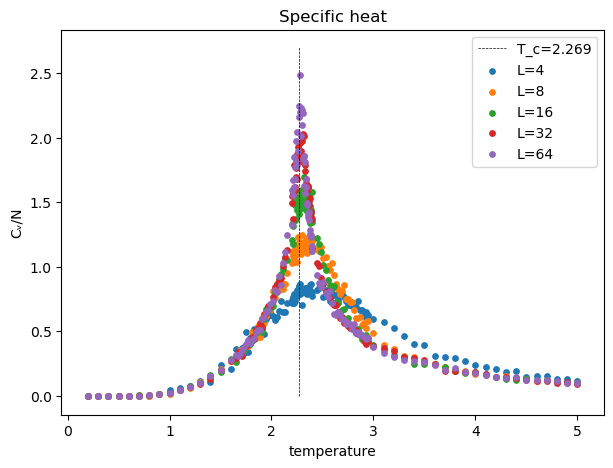

In [209]:
fig = figure("pyplot",figsize=(7,5))
scatter(temps,(L4.C_v).*4^2,s=15,label="L=4")
scatter(temps,(L8.C_v).*8^2,s=15,label="L=8")
scatter(temps,(L16.C_v).*16^2,s=15,label="L=16")
scatter(temps,(L32.C_v).*32^2,s=15,label="L=32")
scatter(temps,(L64.C_v).*64^2,s=15,label="L=64")
r = collect(0:0.1:2.7)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Specific heat")
xlabel("temperature")
ylabel("Cᵥ/N")
legend()
savefig("spec_heat.pdf")

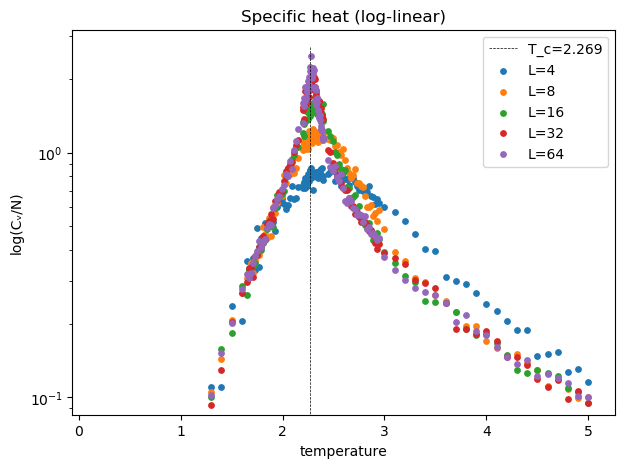

In [210]:
fig = figure("pyplot",figsize=(7,5))
scatter(temps,(L4.C_v).*4^2,s=15,label="L=4")
scatter(temps,(L8.C_v).*8^2,s=15,label="L=8")
scatter(temps,(L16.C_v).*16^2,s=15,label="L=16")
scatter(temps,(L32.C_v).*32^2,s=15,label="L=32")
scatter(temps,(L64.C_v).*64^2,s=15,label="L=64")
r = collect(0:0.1:2.7)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269")
title("Specific heat (log-linear)")
xlabel("temperature")
ylabel("log(Cᵥ/N)")
yscale("log")
legend()
savefig("spec_heat_log.pdf")

# Fit for critical temperature $T_{c}(L)=T_{c}+a_{1} L^{-1 / \nu}$

In [35]:
using Polynomials
using LsqFit
using LaTeXStrings

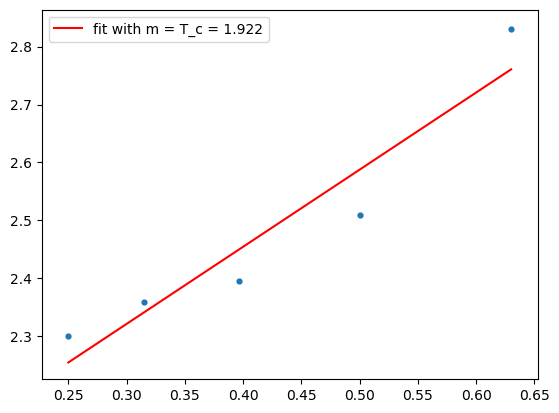

PyObject <matplotlib.legend.Legend object at 0x000000003F1EF780>

In [126]:
Ls = [4, 8, 16, 32, 64]
ls = (Ls).^(-1/1.0)
maxima = [temps[findall(a->a==maximum(L4.Xi), L4.Xi)];temps[findall(a->a==maximum(L8.Xi), L8.Xi)];temps[findall(a->a==maximum(L16.Xi), L16.Xi)];temps[findall(a->a==maximum(L32.Xi), L32.Xi)];temps[findall(a->a==maximum(L64.Xi), L64.Xi)]]
scatter(ls,maxima,s=12)
p = polyfit(ls, maxima,1)
t_c = round(p.a[1],digits=3)
plot(ls,p(ls),c="red",label="fit with m = T_c = $t_c")
legend()

## Least square fit with estimated erros 

In [105]:
model(x, p) = p[1].+p[2].*x
Ls = [4, 8, 16, 32, 64]
ls = (Ls).^(-1/1.01)
maxima = [temps[findall(a->a==maximum(L4.Xi), L4.Xi)];temps[findall(a->a==maximum(L8.Xi), L8.Xi)];temps[findall(a->a==maximum(L16.Xi), L16.Xi)];temps[findall(a->a==maximum(L32.Xi), L32.Xi)];temps[findall(a->a==maximum(L64.Xi), L64.Xi)]]

5-element Array{Float64,1}:
 2.83 
 2.51 
 2.395
 2.36 
 2.3  

In [106]:
f = curve_fit(model, ls, maxima, [0.5,0.5])

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([2.26436, 2.17281], [-0.0149284, 0.0316132, 0.00894246, -0.025367, -0.000260305], [1.0 0.253455; 1.0 0.1276; … ; 1.0 0.0323409; 1.0 0.0162818], true, Float64[])

In [107]:
a,b=f.param

2-element Array{Float64,1}:
 2.264362427557611
 2.172807715534901

In [108]:
c,d = estimate_errors(f,0.95)
a+c

┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[108]:1
└ @ Core In[108]:1


2.319484014323495

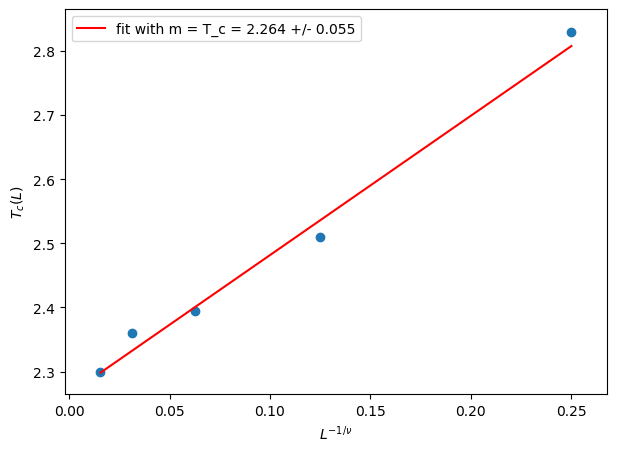

In [109]:
fig = figure("pyplot",figsize=(7,5))
Ls = [4, 8, 16, 32, 64]
ls = (Ls).^(-1/1.0)
maxima = [temps[findall(a->a==maximum(L4.Xi), L4.Xi)];temps[findall(a->a==maximum(L8.Xi), L8.Xi)];temps[findall(a->a==maximum(L16.Xi), L16.Xi)];temps[findall(a->a==maximum(L32.Xi), L32.Xi)];temps[findall(a->a==maximum(L64.Xi), L64.Xi)]]
scatter(ls,maxima)
t_c=round(a,digits=3)
err = round(c,digits=3)
plot(ls,b.*ls.+a, c="red",label="fit with m = T_c = $t_c +/- $err")
legend()
xlabel(L"L^{-1/ν}")
ylabel(L"$T_c(L)$")
savefig("crit_temp.pdf")

# Scaling functions $\chi_{T} L^{-\gamma / v}$ over $\left(1-T / T_{c}\right) L^{1 / v}$

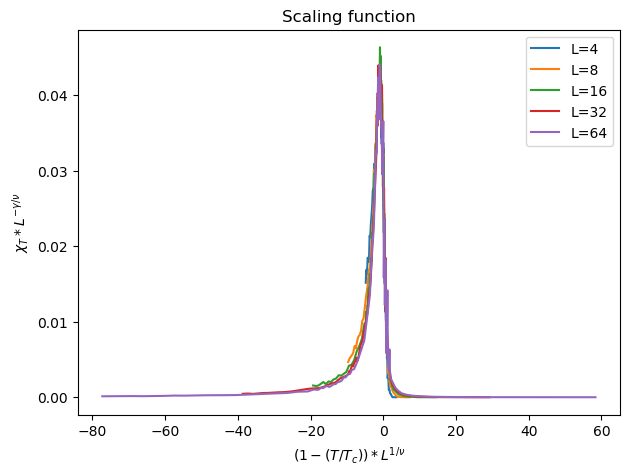

In [150]:
fig = figure("pyplot",figsize=(7,5))
g = ((-1.78)/1.0)
ys4 = ((L4.Xi).*4^2).*4^g
xs4 = @.(1-(temps/2.265))*4^(1/1.0)
ys8 = ((L8.Xi).*8^2).*8^g
xs8 = @.(1-(temps/2.265))*8^(1/1.0)
ys16 = ((L16.Xi).*16^2).*16^g
xs16 = @.(1-(temps/2.265))*16^(1/1.0)
ys32 = ((L32.Xi).*32^2).*32^g
xs32 = @.(1-(temps/2.265))*32^(1/1.0)
ys64 = ((L64.Xi).*64^2).*64^g
xs64 = @.(1-(temps/2.265))*64^(1/1.0)

plot(xs4,ys4,label="L=4")
plot(xs8,ys8,label="L=8")
plot(xs16,ys16,label="L=16")
plot(xs32,ys32,label="L=32")
plot(xs64,ys64,label="L=64")
title("Scaling function")
xlabel(L"$(1-(T/T_c))* L^{1 / ν}$")
ylabel(L"$χ_T*L^{-γ / ν}$")
legend()
savefig("scale1.pdf")

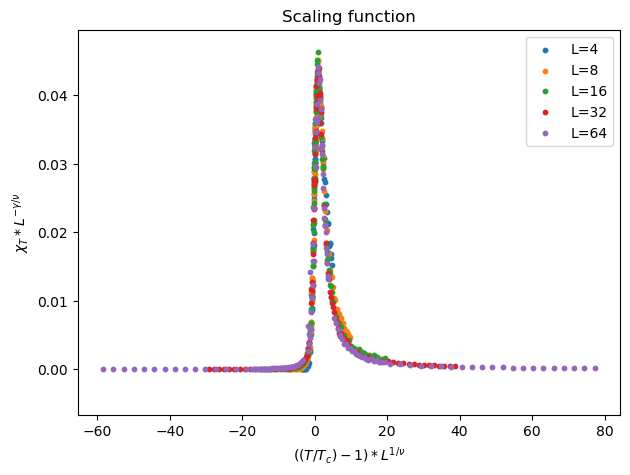

In [153]:
fig = figure("pyplot",figsize=(7,5))
g = ((-1.78)/1.0)
ys4 = ((L4.Xi).*4^2).*4^g
xs4 = @.((temps/2.265)-1)*4^(1/1.0)
ys8 = ((L8.Xi).*8^2).*8^g
xs8 = @.((temps/2.265)-1)*8^(1/1.0)
ys16 = ((L16.Xi).*16^2).*16^g
xs16 = @.((temps/2.265)-1)*16^(1/1.0)
ys32 = ((L32.Xi).*32^2).*32^g
xs32 = @.((temps/2.265)-1)*32^(1/1.0)
ys64 = ((L64.Xi).*64^2).*64^g
xs64 = @.((temps/2.265)-1)*64^(1/1.0)

scatter(xs4,ys4,s=10,label="L=4")
scatter(xs8,ys8,s=10,label="L=8")
scatter(xs16,ys16,s=10,label="L=16")
scatter(xs32,ys32,s=10,label="L=32")
scatter(xs64,ys64,s=10,label="L=64")
title("Scaling function")
xlabel(L"$((T/T_c)-1)* L^{1 / ν}$")
ylabel(L"$χ_T*L^{-γ / ν}$")
legend()
savefig("scale1-scatter.pdf")

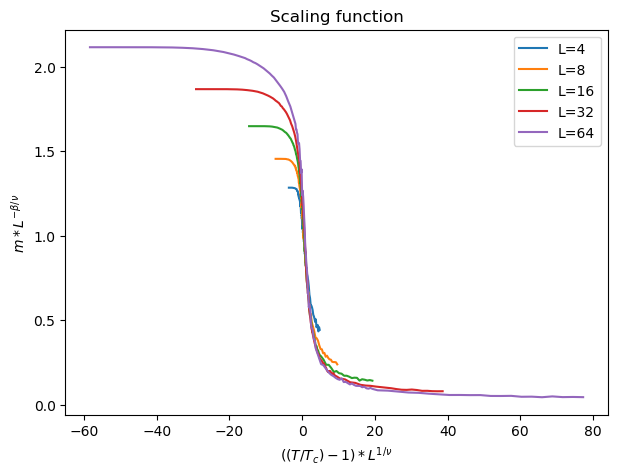

In [154]:
fig = figure("pyplot",figsize=(7,5))
g = ((0.18)/1.0)
ys4 = ((L4.M)).*4^g
xs4 = @.((temps/2.265)-1)*4^(1/1.0)
ys8 = ((L8.M)).*8^g
xs8 = @.((temps/2.265)-1)*8^(1/1.0)
ys16 = ((L16.M)).*16^g
xs16 = @.((temps/2.265)-1)*16^(1/1.0)
ys32 = ((L32.M)).*32^g
xs32 = @.((temps/2.265)-1)*32^(1/1.0)
ys64 = ((L64.M)).*64^g
xs64 = @.((temps/2.265)-1)*64^(1/1.0)

plot(xs4,ys4,label="L=4")
plot(xs8,ys8,label="L=8")
plot(xs16,ys16,label="L=16")
plot(xs32,ys32,label="L=32")
plot(xs64,ys64,label="L=64")
title("Scaling function")
xlabel(L"$((T/T_c)-1)* L^{1 / ν}$")
ylabel(L"$m*L^{-β / ν}$")
legend()
savefig("scale2.pdf")

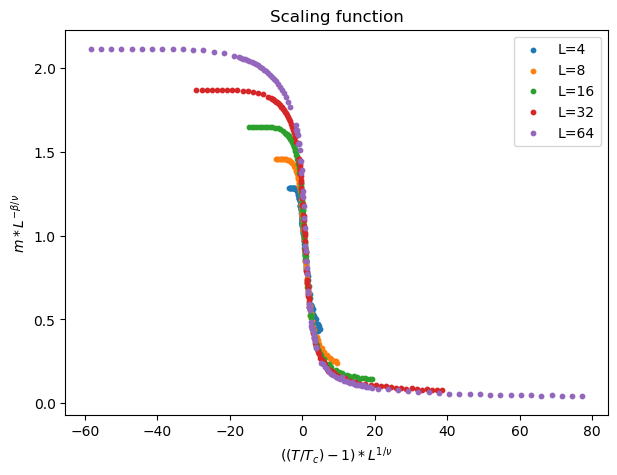

In [156]:
fig = figure("pyplot",figsize=(7,5))
g = ((0.18)/1.0)
ys4 = ((L4.M)).*4^g
xs4 = @.((temps/2.265)-1)*4^(1/1.0)
ys8 = ((L8.M)).*8^g
xs8 = @.((temps/2.265)-1)*8^(1/1.0)
ys16 = ((L16.M)).*16^g
xs16 = @.((temps/2.265)-1)*16^(1/1.0)
ys32 = ((L32.M)).*32^g
xs32 = @.((temps/2.265)-1)*32^(1/1.0)
ys64 = ((L64.M)).*64^g
xs64 = @.((temps/2.265)-1)*64^(1/1.0)

scatter(xs4,ys4,s=10,label="L=4")
scatter(xs8,ys8,s=10,label="L=8")
scatter(xs16,ys16,s=10,label="L=16")
scatter(xs32,ys32,s=10,label="L=32")
scatter(xs64,ys64,s=10,label="L=64")
title("Scaling function")
xlabel(L"$((T/T_c)-1)* L^{1 / ν}$")
ylabel(L"$m*L^{-β / ν}$")
legend()
savefig("scale2-scatter.pdf")

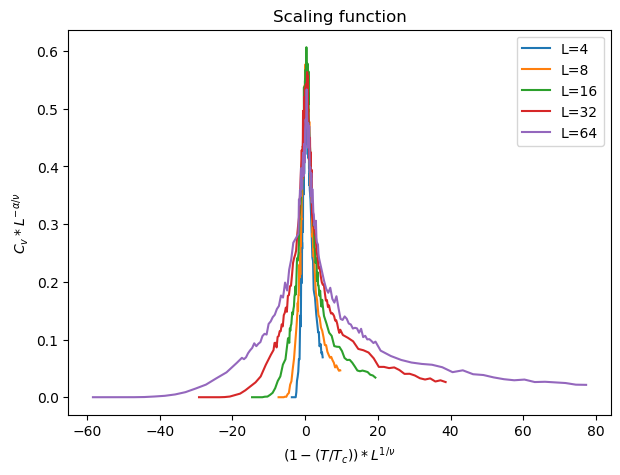

In [157]:
fig = figure("pyplot",figsize=(7,5))
g = ((-0.37)/1.0)
ys4 = ((L4.C_v).*4^2).*4^g
xs4 = @.((temps/2.265)-1)*4^(1/1.0)
ys8 = ((L8.C_v).*8^2).*8^g
xs8 = @.((temps/2.265)-1)*8^(1/1.0)
ys16 = ((L16.C_v).*16^2).*16^g
xs16 = @.((temps/2.265)-1)*16^(1/1.0)
ys32 = ((L32.C_v).*32^2).*32^g
xs32 = @.((temps/2.265)-1)*32^(1/1.0)
ys64 = ((L64.C_v).*64^2).*64^g
xs64 = @.((temps/2.265)-1)*64^(1/1.0)

plot(xs4,ys4,label="L=4")
plot(xs8,ys8,label="L=8")
plot(xs16,ys16,label="L=16")
plot(xs32,ys32,label="L=32")
plot(xs64,ys64,label="L=64")
title("Scaling function")
xlabel(L"$(1-(T/T_c))* L^{1 / ν}$")
ylabel(L"$C_v*L^{-α / ν}$")
legend()
savefig("scale3.pdf")

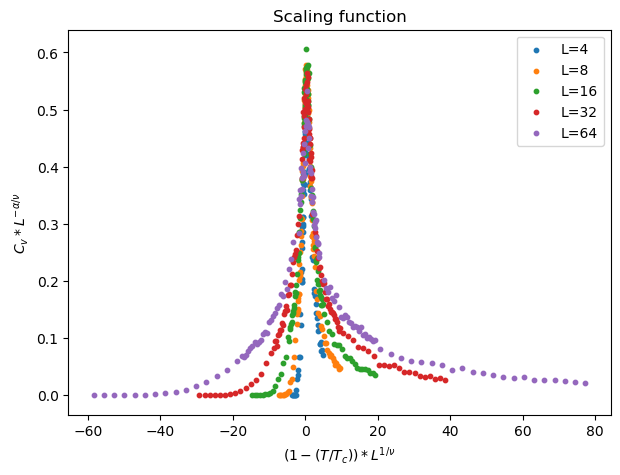

In [158]:
fig = figure("pyplot",figsize=(7,5))
g = ((-0.37)/1.0)
ys4 = ((L4.C_v).*4^2).*4^g
xs4 = @.((temps/2.265)-1)*4^(1/1.0)
ys8 = ((L8.C_v).*8^2).*8^g
xs8 = @.((temps/2.265)-1)*8^(1/1.0)
ys16 = ((L16.C_v).*16^2).*16^g
xs16 = @.((temps/2.265)-1)*16^(1/1.0)
ys32 = ((L32.C_v).*32^2).*32^g
xs32 = @.((temps/2.265)-1)*32^(1/1.0)
ys64 = ((L64.C_v).*64^2).*64^g
xs64 = @.((temps/2.265)-1)*64^(1/1.0)

scatter(xs4,ys4,s=10,label="L=4")
scatter(xs8,ys8,s=10,label="L=8")
scatter(xs16,ys16,s=10,label="L=16")
scatter(xs32,ys32,s=10,label="L=32")
scatter(xs64,ys64,s=10,label="L=64")
title("Scaling function")
xlabel(L"$(1-(T/T_c))* L^{1 / ν}$")
ylabel(L"$C_v*L^{-α / ν}$")
legend()
savefig("scale3-scatter.pdf")

# 4th cumulant 

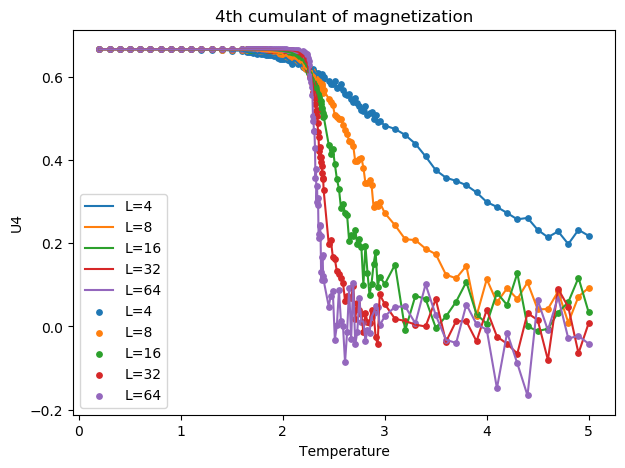

In [217]:
fig = figure("pyplot",figsize=(7,5))
cumuL4 = [(1-L4.Cu[i]/(3*L4.M_Sq[i]^2)) for i in 1:length(L4.Cu)]
scatter(temps,cumuL4,s=15,label="L=4")
plot(temps,cumuL4,label="L=4")
cumuL8 = [(1-L8.Cu[i]/(3*L8.M_Sq[i]^2)) for i in 1:length(L8.Cu)]
scatter(temps,cumuL8,s=15,label="L=8")
plot(temps,cumuL8,label="L=8")
cumuL16 = [(1-L16.Cu[i]/(3*L16.M_Sq[i]^2)) for i in 1:length(L16.Cu)]
scatter(temps,cumuL16,s=15,label="L=16")
plot(temps,cumuL16,label="L=16")
cumuL32 = [(1-L32.Cu[i]/(3*L32.M_Sq[i]^2)) for i in 1:length(L32.Cu)]
scatter(temps,cumuL32,s=15,label="L=32")
plot(temps,cumuL32,label="L=32")
cumuL64 = [(1-L64.Cu[i]/(3*L64.M_Sq[i]^2)) for i in 1:length(L64.Cu)]
scatter(temps,cumuL64,s=15,label="L=64")
plot(temps,cumuL64,label="L=64")
title("4th cumulant of magnetization")
xlabel("Temperature")
ylabel("U4")
legend()
savefig("4_cu.pdf")

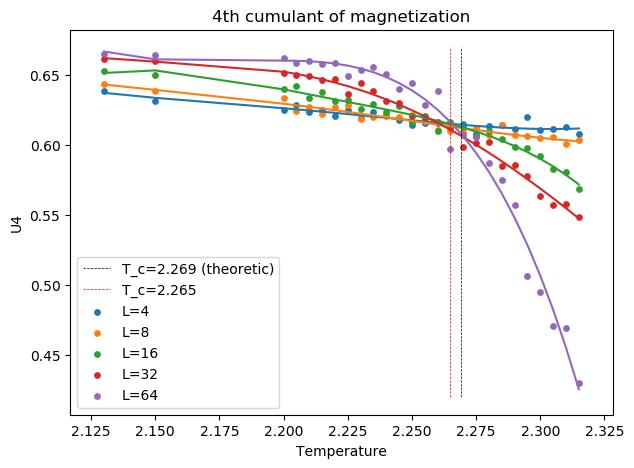

Poly(-6818.159843129885 + 12809.65970130565*x - 9017.869848743636*x^2 + 2819.732500643279*x^3 - 330.42708346198106*x^4)


In [167]:
fig = figure("pyplot",figsize=(7,5))
cumuL4 = [(1-L4.Cu[i]/(3*L4.M_Sq[i]^2)) for i in 1:length(L4.Cu)]
scatter(temps[65:90],cumuL4[65:90],s=15,label="L=4")
p = polyfit(temps[65:90], cumuL4[65:90],4)
ycumusL4 = p(temps[65:90])
plot(temps[65:90],p(temps[65:90]))
cumuL8 = [(1-L8.Cu[i]/(3*L8.M_Sq[i]^2)) for i in 1:length(L8.Cu)]
scatter(temps[65:90],cumuL8[65:90],s=15,label="L=8")
p = polyfit(temps[65:90], cumuL8[65:90],4)
ycumusL8 = p(temps[65:90])
plot(temps[65:90],p(temps[65:90]))
cumuL16 = [(1-L16.Cu[i]/(3*L16.M_Sq[i]^2)) for i in 1:length(L16.Cu)]
scatter(temps[65:90],cumuL16[65:90],s=15,label="L=16")
p = polyfit(temps[65:90], cumuL16[65:90],4)
ycumusL16 = p(temps[65:90])
plot(temps[65:90],p(temps[65:90]))
cumuL32 = [(1-L32.Cu[i]/(3*L32.M_Sq[i]^2)) for i in 1:length(L32.Cu)]
scatter(temps[65:90],cumuL32[65:90],s=15,label="L=32")
p = polyfit(temps[65:90], cumuL32[65:90],4)
ycumusL32 = p(temps[65:90])
plot(temps[65:90],p(temps[65:90]))
cumuL64 = [(1-L64.Cu[i]/(3*L64.M_Sq[i]^2)) for i in 1:length(L64.Cu)]
scatter(temps[65:90],cumuL64[65:90],s=15,label="L=64")
p = polyfit(temps[65:90], cumuL64[65:90],4)
ycumusL64 = p(temps[65:90])
plot(temps[65:90],p(temps[65:90]))

#theoretical critical temperature 
r = collect(0.42:0.01:0.67)
plot(ones(length(r)).*2.269,r,c="black",linestyle="dashed",linewidth=0.5,label="T_c=2.269 (theoretic)")

#find the smallest distance between fits for critical temperature
differences = []
for i in 1:26
    a = [ycumusL4[i],ycumusL8[i],ycumusL16[i],ycumusL32[i],ycumusL64[i]]
    maxi = maximum(a)
    mini = minimum(a)
    push!(differences, maxi-mini)
end

#and plot it 
plot(ones(length(r)).*temps[65:90][findall(a->a==minimum(differences), differences)],r,c="red",linestyle="dashed",linewidth=0.5,label="T_c=2.265")

title("4th cumulant of magnetization")
xlabel("Temperature")
ylabel("U4")
println(p)
legend()
savefig("4_cu_zoom.pdf")

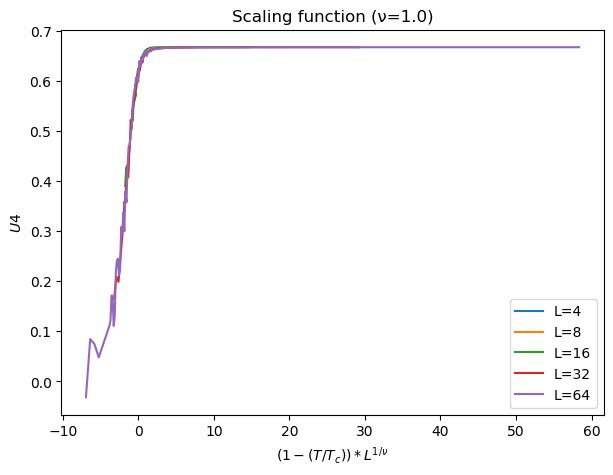

In [160]:
fig = figure("pyplot",figsize=(7,5))

ys4 = cumuL4[44:129]
xs4 = @.(1-(temps[44:129]/2.265))*4^(1/1.0)
ys8 = cumuL8[44:129]
xs8 = @.(1-(temps[44:129]/2.265))*8^(1/1.0)
ys16 = cumuL16[44:129]
xs16 = @.(1-(temps[44:129]/2.265))*16^(1/1.0)
ys32 = cumuL32[44:129]
xs32 = @.(1-(temps[44:129]/2.265))*32^(1/1.0)
ys64 = cumuL64[44:129]
xs64 = @.(1-(temps[44:129]/2.265))*64^(1/1.0)

plot(xs4,ys4,label="L=4")
plot(xs8,ys8,label="L=8")
plot(xs16,ys16,label="L=16")
plot(xs32,ys32,label="L=32")
plot(xs64,ys64,label="L=64")
title("Scaling function (ν=1.0)")
xlabel(L"$(1-(T/T_c))* L^{1 / ν}$")
ylabel(L"$U4$")
legend()
savefig("crit_4cu.pdf")

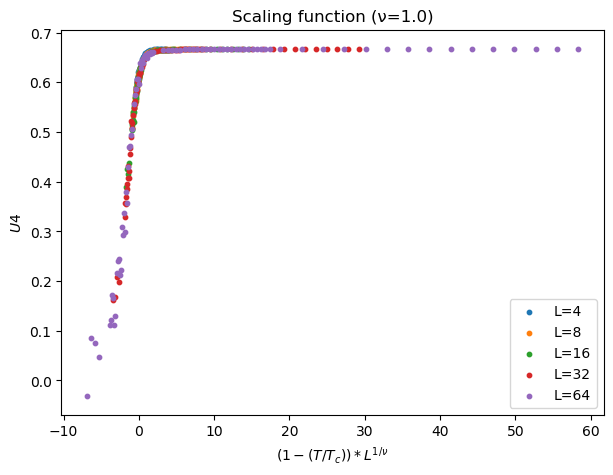

In [101]:
fig = figure("pyplot",figsize=(7,5))
nu = 1.0
ys4 = cumuL4[44:129]
xs4 = @.(1-(temps[44:129]/2.265))*4^(1/nu)
ys8 = cumuL8[44:129]
xs8 = @.(1-(temps[44:129]/2.265))*8^(1/nu)
ys16 = cumuL16[44:129]
xs16 = @.(1-(temps[44:129]/2.265))*16^(1/nu)
ys32 = cumuL32[44:129]
xs32 = @.(1-(temps[44:129]/2.265))*32^(1/nu)
ys64 = cumuL64[44:129]
xs64 = @.(1-(temps[44:129]/2.265))*64^(1/nu)

scatter(xs4,ys4,s=10,label="L=4")
scatter(xs8,ys8,s=10,label="L=8")
scatter(xs16,ys16,s=10,label="L=16")
scatter(xs32,ys32,s=10,label="L=32")
scatter(xs64,ys64,s=10,label="L=64")
title("Scaling function (ν=$nu)")
xlabel(L"$(1-(T/T_c))* L^{1 / ν}$")
ylabel(L"$U4$")
legend()
savefig("crit_4cu-scatter.pdf")

# Critical exponents

# Calculate $\nu$

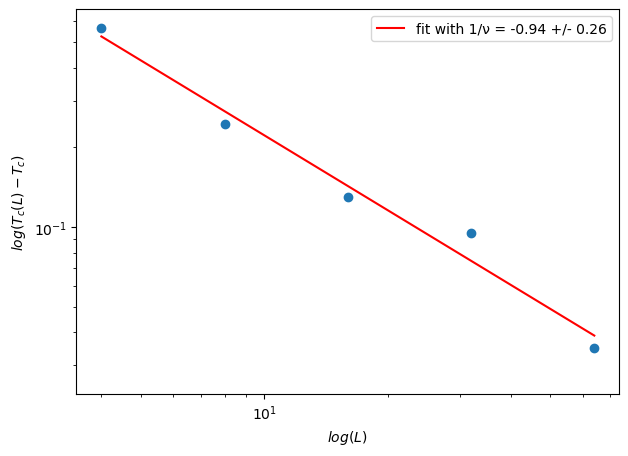

┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[102]:10
└ @ Core In[102]:10


In [102]:
fig = figure("pyplot",figsize=(7,5))
maxima = [temps[findall(a->a==maximum(L4.Xi), L4.Xi)];temps[findall(a->a==maximum(L8.Xi), L8.Xi)];temps[findall(a->a==maximum(L16.Xi), L16.Xi)];temps[findall(a->a==maximum(L32.Xi), L32.Xi)];temps[findall(a->a==maximum(L64.Xi), L64.Xi)]]
new_max = maxima.-2.265
Ls = [4, 8, 16, 32, 64]
scatter(Ls,new_max)
#Fit 
model(x, p) = p[1].+p[2].*x
f = curve_fit(model, log.(Ls), log.(new_max), [0.5,0.5])
a,b=f.param
c,d = estimate_errors(f,0.95)
t_c=round(b,digits=2)
err = round(d,digits=2)
plot(Ls,exp.(b.*log.(Ls).+a), c="red",label="fit with 1/ν = $t_c +/- $err")
ylabel(L"$log(T_c(L)-T_c)$")
xlabel(L"$log(L)$")
xscale("log")
yscale("log")
legend()
savefig("1_nu.pdf")

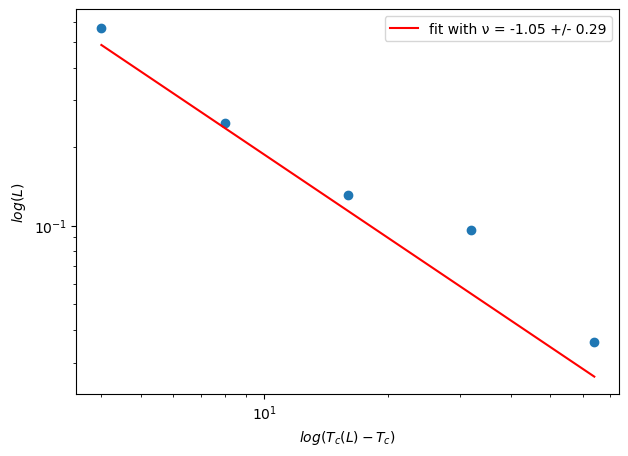

┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[110]:10
└ @ Core In[110]:10


In [110]:
fig = figure("pyplot",figsize=(7,5))
maxima = [temps[findall(a->a==maximum(L4.Xi), L4.Xi)];temps[findall(a->a==maximum(L8.Xi), L8.Xi)];temps[findall(a->a==maximum(L16.Xi), L16.Xi)];temps[findall(a->a==maximum(L32.Xi), L32.Xi)];temps[findall(a->a==maximum(L64.Xi), L64.Xi)]]
new_max = maxima.-2.264
Ls = [4, 8, 16, 32, 64]
scatter(Ls,new_max)
#Fit 
model(x, p) = p[1].+p[2].*x
f = curve_fit(model, log.(new_max), log.(Ls), [0.5,0.5])
a,b=f.param
c,d = estimate_errors(f,0.95)
t_c=round(b,digits=2)
err = round(d,digits=2)
plot(Ls,exp.(b.*log.(Ls).+a), c="red",label="fit with ν = $t_c +/- $err")
xlabel(L"$log(T_c(L)-T_c)$")
ylabel(L"$log(L)$")
xscale("log")
yscale("log")
legend()
savefig("nu.pdf")

# Calculate $\gamma$

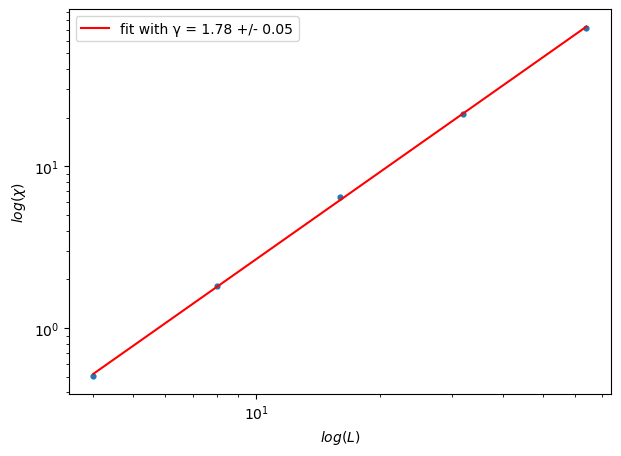

1.8327620042080786
1.7345099804646344

┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[129]:14
└ @ Core In[129]:14


In [129]:
fig = figure("pyplot",figsize=(7,5))
Ls = [4, 8, 16, 32, 64]
L4_new=(L4.Xi).*4^2
L8_new=(L8.Xi).*8^2
L16_new=(L16.Xi).*16^2
L32_new=(L32.Xi).*32^2
L64_new=(L64.Xi).*64^2
maxima = [L4_new[findall(a->a==maximum(L4.Xi), L4.Xi)];L8_new[findall(a->a==maximum(L8.Xi), L8.Xi)];L16_new[findall(a->a==maximum(L16.Xi), L16.Xi)];L32_new[findall(a->a==maximum(L32.Xi), L32.Xi)];L64_new[findall(a->a==maximum(L64.Xi), L64.Xi)]]
scatter(Ls,maxima,s=12)
#Fit 
model(x, p) = p[1].+p[2].*x
f = curve_fit(model, log.(Ls), log.(maxima), [0.5,0.5])
a,b=f.param
c,d = estimate_errors(f,0.95)
t_c=round(b,digits=2)
err = round(d,digits=2)
plot(Ls,exp.(b.*log.(Ls).+a), c="red",label="fit with γ = $t_c +/- $err")
ylabel(L"$log(χ)$")
xlabel(L"$log(L)$")
xscale("log")
yscale("log")
legend()
println(b+d)
println(b-d)
savefig("gamma.pdf")

# Calculate $\beta$

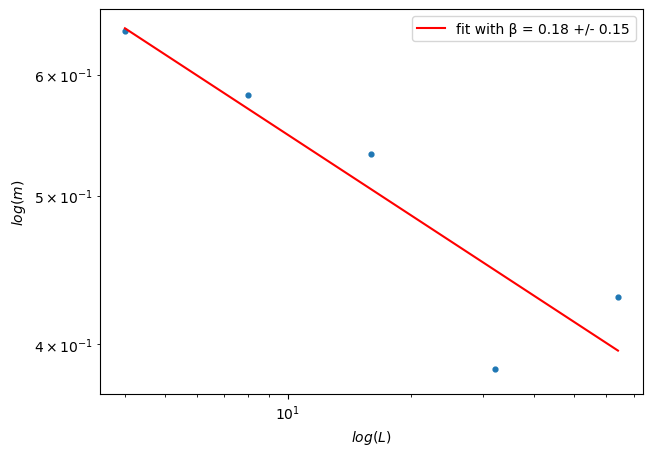

-0.025641925050860798
-0.32440639517252523

┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[169]:14
└ @ Core In[169]:14


In [169]:
fig = figure("pyplot",figsize=(7,5))
Ls = [4, 8, 16, 32, 64]
L4_new=(L4.Xi).*4^2
L8_new=(L8.Xi).*8^2
L16_new=(L16.Xi).*16^2
L32_new=(L32.Xi).*32^2
L64_new=(L64.Xi).*64^2
maxima = [L4.M[findall(a->a==maximum(L4.Xi), L4.Xi)];L8.M[findall(a->a==maximum(L8.Xi), L8.Xi)];L16.M[findall(a->a==maximum(L16.Xi), L16.Xi)];L32.M[findall(a->a==maximum(L32.Xi), L32.Xi)];L64.M[findall(a->a==maximum(L64.Xi), L64.Xi)]]
scatter(Ls,maxima,s=12)
#Fit 
model(x, p) = p[1].+p[2].*x
f = curve_fit(model, log.(Ls), log.(maxima), [0.5,0.5])
a,b=f.param
c,d = estimate_errors(f,0.95)
t_c=abs(round(b,digits=2))
err = round(d,digits=2)
plot(Ls,exp.(b.*log.(Ls).+a), c="red",label="fit with β = $t_c +/- $err")
ylabel(L"$log(m)$")
xlabel(L"$log(L)$")
xscale("log")
yscale("log")
legend()
println(b+d)
println(b-d)
savefig("beta.pdf")

# finding $\alpha$

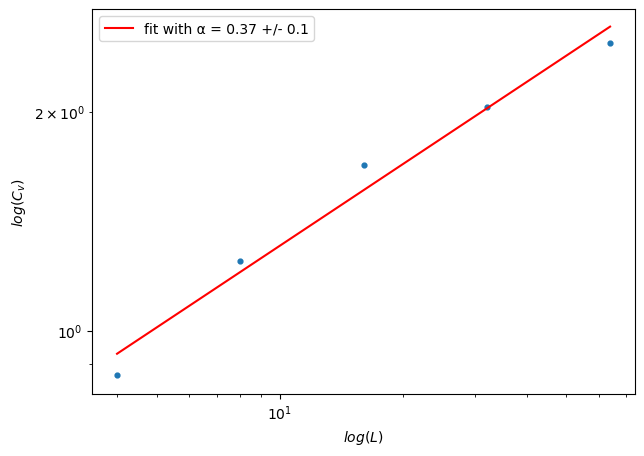

0.476607633111819
0.27084335632195


┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[113]:14
└ @ Core In[113]:14


In [113]:
fig = figure("pyplot",figsize=(7,5))
Ls = [4, 8, 16, 32, 64]
L4_new=(L4.C_v).*4^2
L8_new=(L8.C_v).*8^2
L16_new=(L16.C_v).*16^2
L32_new=(L32.C_v).*32^2
L64_new=(L64.C_v).*64^2
maxima = [L4_new[findall(a->a==maximum(L4.C_v), L4.C_v)];L8_new[findall(a->a==maximum(L8.C_v), L8.C_v)];L16_new[findall(a->a==maximum(L16.C_v), L16.C_v)];L32_new[findall(a->a==maximum(L32.C_v), L32.C_v)];L64_new[findall(a->a==maximum(L64.C_v), L64.C_v)]]
scatter(Ls,maxima,s=12)
#Fit 
model(x, p) = p[1].+p[2].*x
f = curve_fit(model, log.(Ls), log.(maxima), [0.5,0.5])
a,b=f.param
c,d = estimate_errors(f,0.95)
t_c=round(b,digits=2)
err = round(d,digits=2)
plot(Ls,exp.(b.*log.(Ls).+a), c="red",label="fit with α = $t_c +/- $err")
ylabel(L"$log(C_v)$")
xlabel(L"$log(L)$")
xscale("log")
yscale("log")
legend()
println(b+d)
println(b-d)
savefig("alpha.pdf")

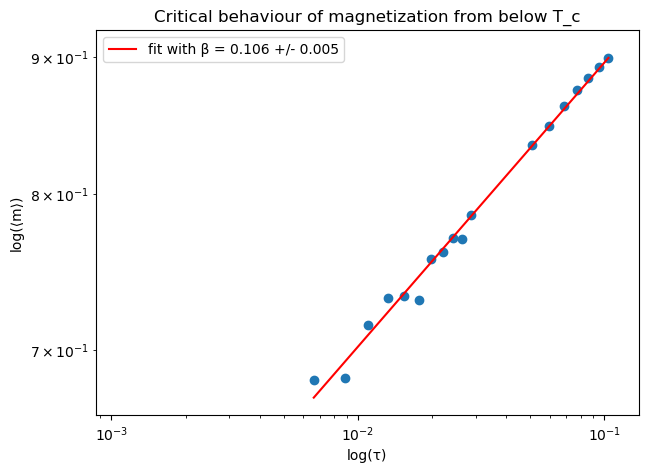

┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[162]:12
└ @ Core In[162]:12


In [162]:
fig = figure("pyplot",figsize=(7,5))
t_red= abs.((temps[findall(a->a<2.265, temps)].-2.265)./2.265)
scatter(t_red[3:20],L64.M[findall(a->a<2.265, temps)][3:20])
model(x, p) = p[1].+p[2].*x
f = curve_fit(model, log.(t_red[3:20]), log.(L64.M[findall(a->a<2.265, temps)][3:20]), [0.5,0.5])
a,b=f.param
c,d = estimate_errors(f,0.95)
t_c=round(b,digits=3)
err = round(d,digits=3)
plot(t_red[3:20],exp.(b.*log.(t_red[3:20]).+a), c="red",label="fit with β = $t_c +/- $err")
title("Critical behaviour of magnetization from below T_c")
xlabel("log(τ)")
ylabel("log(⟨m⟩)")
legend()
xscale("log")
yscale("log")
savefig("crit_beta.pdf")

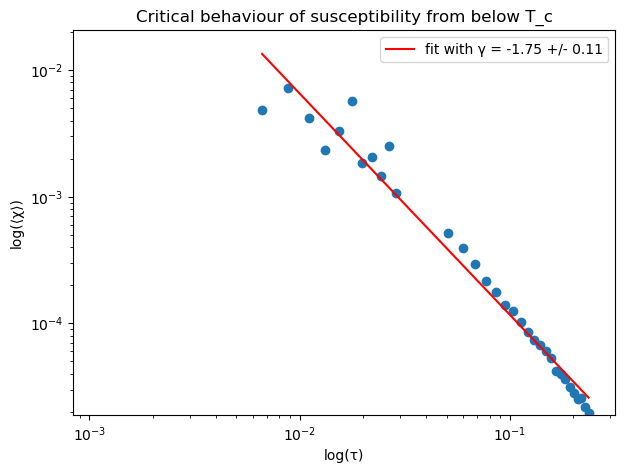

┌ Warning: `estimate_errors(fit::LsqFitResult, confidence=0.95; rtol::Real=NaN, atol::Real=0)` is deprecated, use `margin_error(fit, 1 - confidence; rtol=rtol, atol=atol)` instead.
│   caller = top-level scope at In[123]:12
└ @ Core In[123]:12


In [123]:
fig = figure("pyplot",figsize=(7,5))
t_red= abs.((temps[findall(a->a<2.265, temps)].-2.265)./2.265)
scatter(t_red[3:35],L64.Xi[findall(a->a<2.265, temps)][3:35])
#Fit 
model(x, p) = p[1].+p[2].*x
f = curve_fit(model, log.(t_red[3:35]), log.(L64.Xi[findall(a->a<2.265, temps)][3:35]), [0.5,0.5])
a,b=f.param
c,d = estimate_errors(f,0.95)
t_c=round(b,digits=2)
err = round(d,digits=2)
plot(t_red[3:35],exp.(b.*log.(t_red[3:35]).+a), c="red",label="fit with γ = $t_c +/- $err")
title("Critical behaviour of susceptibility from below T_c")
xlabel("log(τ)")
ylabel("log(⟨χ⟩)")
legend()
xscale("log")
yscale("log")
savefig("crit_gamma.pdf")

# Critical exponents Polynomials package 

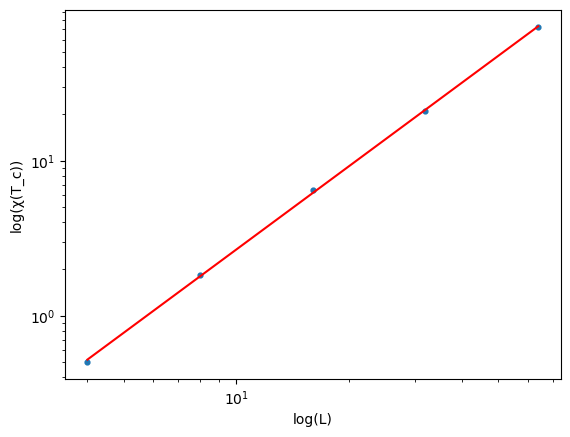

Poly(-3.1235787020192034 + 1.7836359929235843*x)


In [164]:
Ls = [4, 8, 16, 32, 64]
L4_new=(L4.Xi).*4^2
L8_new=(L8.Xi).*8^2
L16_new=(L16.Xi).*16^2
L32_new=(L32.Xi).*32^2
L64_new=(L64.Xi).*64^2
maxima = [L4_new[findall(a->a==maximum(L4.Xi), L4.Xi)];L8_new[findall(a->a==maximum(L8.Xi), L8.Xi)];L16_new[findall(a->a==maximum(L16.Xi), L16.Xi)];L32_new[findall(a->a==maximum(L32.Xi), L32.Xi)];L64_new[findall(a->a==maximum(L64.Xi), L64.Xi)]]
scatter(Ls,maxima,s=12)
p = polyfit(log.(Ls), log.(maxima),1)
println(p)
plot(Ls,exp.(p(log.(Ls))),c="red",label="")
xlabel("log(L)")
ylabel("log(χ(T_c))")
#legend()
xscale("log")
yscale("log")

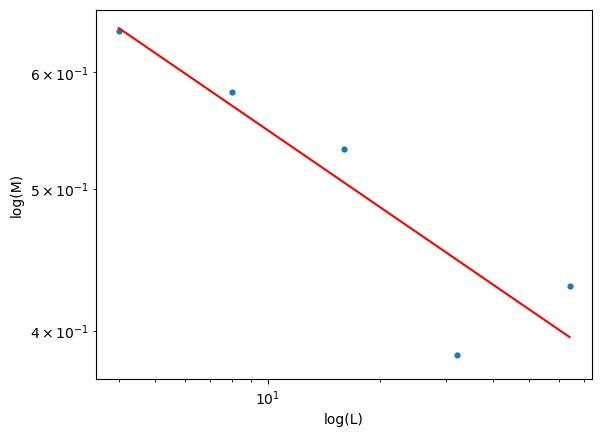

Poly(-0.19855992836486772 - 0.17502416021390568*x)


In [165]:
Ls = [4, 8, 16, 32, 64]
maxima = [L4.M[findall(a->a==maximum(L4.Xi), L4.Xi)];L8.M[findall(a->a==maximum(L8.Xi), L8.Xi)];L16.M[findall(a->a==maximum(L16.Xi), L16.Xi)];L32.M[findall(a->a==maximum(L32.Xi), L32.Xi)];L64.M[findall(a->a==maximum(L64.Xi), L64.Xi)]]
scatter(Ls,maxima,s=12)
p = polyfit(log.(Ls), log.(maxima),1)
println(p)
plot(Ls,exp.(p(log.(Ls))),c="red",label="")
xlabel("log(L)")
ylabel("log(M)")
#legend()
xscale("log")
yscale("log")

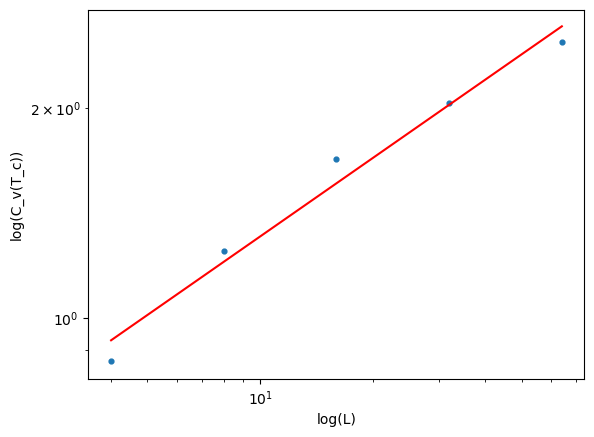

Poly(-0.5913672472326569 + 0.37372549471687605*x)


In [166]:
Ls = [4, 8, 16, 32, 64]
L4_new=(L4.C_v).*4^2
L8_new=(L8.C_v).*8^2
L16_new=(L16.C_v).*16^2
L32_new=(L32.C_v).*32^2
L64_new=(L64.C_v).*64^2
maxima = [L4_new[findall(a->a==maximum(L4.C_v), L4.C_v)];L8_new[findall(a->a==maximum(L8.C_v), L8.C_v)];L16_new[findall(a->a==maximum(L16.C_v), L16.C_v)];L32_new[findall(a->a==maximum(L32.C_v), L32.C_v)];L64_new[findall(a->a==maximum(L64.C_v), L64.C_v)]]
scatter(Ls,maxima,s=12)
p = polyfit(log.(Ls), log.(maxima),1)
#t_c = round(p.a[1],digits=3)
println(p)
plot(Ls,exp.(p(log.(Ls))),c="red",label="")
xlabel("log(L)")
ylabel("log(C_v(T_c))")
#legend()
xscale("log")
yscale("log")